# Applied Deep Learning - a use case based approach to understand deep neural networks

### Umberto Michelucci

Buy the book: https://www.apress.com/us/book/9781484237892

(C) Umberto Michelucci 2018-2019 - umberto.michelucci@gmail.com 

github repository: https://github.com/Apress/applied-deep-learning

## NOTE

This notebook contains code that I have used to produce some of the images in the book, especially the ones with the 3D surfaces and the path that each optimizer is choosing. If you want something with exercises that you can do, consider checking the other notebooks in this folder.

## Let's start

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib as mpl

In [116]:
# The data to fit
m = 30
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

In [117]:
X_ = x.reshape(1,30)
Y_ = y.reshape(1,30)

# Model 1 - Gradient Descent

In [345]:
n_dim = 1
tf.reset_default_graph()
tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [1, None])
learning_rate = tf.placeholder(tf.float32, shape=())


W1 = tf.Variable(tf.constant(1.5, shape= [1,1]))
#    tf.truncated_normal([1, n_dim], stddev=2.0 / np.sqrt(n_dim))) 
b1 = tf.Variable(tf.constant(0.0, shape = [1,1]) )
init = tf.global_variables_initializer()

y_ = tf.matmul(W1, X) + b1 
cost = tf.reduce_mean(tf.square(y_-Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Model 2 - Adam Optimizer

In [336]:
n_dim = 1
tf.reset_default_graph()
tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [1, None])
learning_rate = tf.placeholder(tf.float32, shape=())


W1 = tf.Variable(tf.constant(1.5, shape= [1,1]))
#    tf.truncated_normal([1, n_dim], stddev=2.0 / np.sqrt(n_dim))) 
b1 = tf.Variable(tf.constant(0.0, shape = [1,1]) )

y_ = tf.matmul(W1, X) + b1 
cost = tf.reduce_mean(tf.square(y_-Y))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)


init = tf.global_variables_initializer()


# Momentum

In [156]:
n_dim = 1
tf.reset_default_graph()
tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [1, None])
learning_rate = tf.placeholder(tf.float32, shape=())


W1 = tf.Variable(tf.constant(1.5, shape= [1,1]))
#    tf.truncated_normal([1, n_dim], stddev=2.0 / np.sqrt(n_dim))) 
b1 = tf.Variable(tf.constant(0.0, shape = [1,1]) )

y_ = tf.matmul(W1, X) + b1 
cost = tf.reduce_mean(tf.square(y_-Y))
optimizer = tf.train.MomentumOptimizer(learning_rate, momentum = 0.9).minimize(cost)


init = tf.global_variables_initializer()


# RMSPROP

In [306]:
n_dim = 1
tf.reset_default_graph()
tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [1, None])
learning_rate = tf.placeholder(tf.float32, shape=())


W1 = tf.Variable(tf.constant(1.5, shape= [1,1]))
#    tf.truncated_normal([1, n_dim], stddev=2.0 / np.sqrt(n_dim))) 
b1 = tf.Variable(tf.constant(0.0, shape = [1,1]) )

y_ = tf.matmul(W1, X) + b1 
cost = tf.reduce_mean(tf.square(y_-Y))
optimizer = tf.train.RMSPropOptimizer(learning_rate, momentum = 0.9).minimize(cost)


init = tf.global_variables_initializer()


In [154]:
def run_linear_model(training_epochs, train_obs, train_labels, debug = False, learning_r = 0.001):
    sess = tf.Session()
    sess.run(init)
    
    cost_history = np.empty(shape=[0], dtype = float)
    W = np.empty(shape = 0, dtype = float)
    b = np.empty(shape = 0, dtype = float)
    
    W = np.append(W, 2.5)
    b = np.append(b,4)
    
    for epoch in range(training_epochs+1):
        sess.run(optimizer, feed_dict = {X: train_obs, Y: train_labels, learning_rate: learning_r})
        cost_ = sess.run(cost, feed_dict={ X:train_obs, Y: train_labels, learning_rate: learning_r})
        W_ = sess.run(W1, feed_dict={ X:train_obs, Y: train_labels, learning_rate: learning_r})
        b_ = sess.run(b1, feed_dict={ X:train_obs, Y: train_labels, learning_rate: learning_r})
        
        
        cost_history = np.append(cost_history, cost_)
        #W = np.append(W, W_)
        #b = np.append(b, b_)
        W = np.append(W, W_)
        b = np.append(b, b_)
        
        #print("Debug: ", cost_)
        
        if (epoch % 5 == 0) & debug:
            print("Reached epoch",epoch,"cost J =", str.format('{0:.6f}', cost_))
            
            
    return sess, cost_history, W, b

# Models

**Note that to make the code simpler and faster to develop, each time you want to try a different optimizer you have to rebuild the network using the code above.**

In [346]:
sess, cost_history, W, b = run_linear_model(200, X_, Y_, debug = True, learning_r = 0.05)

Reached epoch 0 cost J = 3.571381
Reached epoch 5 cost J = 1.360263
Reached epoch 10 cost J = 0.554300
Reached epoch 15 cost J = 0.248933
Reached epoch 20 cost J = 0.125521
Reached epoch 25 cost J = 0.070707
Reached epoch 30 cost J = 0.043397
Reached epoch 35 cost J = 0.028171
Reached epoch 40 cost J = 0.018894
Reached epoch 45 cost J = 0.012899
Reached epoch 50 cost J = 0.008888
Reached epoch 55 cost J = 0.006154
Reached epoch 60 cost J = 0.004271
Reached epoch 65 cost J = 0.002968
Reached epoch 70 cost J = 0.002063
Reached epoch 75 cost J = 0.001435
Reached epoch 80 cost J = 0.000998
Reached epoch 85 cost J = 0.000694
Reached epoch 90 cost J = 0.000483
Reached epoch 95 cost J = 0.000336
Reached epoch 100 cost J = 0.000234
Reached epoch 105 cost J = 0.000163
Reached epoch 110 cost J = 0.000113
Reached epoch 115 cost J = 0.000079
Reached epoch 120 cost J = 0.000055
Reached epoch 125 cost J = 0.000038
Reached epoch 130 cost J = 0.000027
Reached epoch 135 cost J = 0.000018
Reached epoch 

In [341]:
sess, cost_history_adam, Wadam, badam = run_linear_model(200, X_, Y_, debug = True, learning_r = 0.4)

Reached epoch 0 cost J = 2.688276
Reached epoch 5 cost J = 0.140372
Reached epoch 10 cost J = 0.671187
Reached epoch 15 cost J = 0.130371
Reached epoch 20 cost J = 0.096148
Reached epoch 25 cost J = 0.138887
Reached epoch 30 cost J = 0.004961
Reached epoch 35 cost J = 0.048819
Reached epoch 40 cost J = 0.012341
Reached epoch 45 cost J = 0.009865
Reached epoch 50 cost J = 0.008686
Reached epoch 55 cost J = 0.001844
Reached epoch 60 cost J = 0.003968
Reached epoch 65 cost J = 0.000204
Reached epoch 70 cost J = 0.001667
Reached epoch 75 cost J = 0.000043
Reached epoch 80 cost J = 0.000561
Reached epoch 85 cost J = 0.000027
Reached epoch 90 cost J = 0.000214
Reached epoch 95 cost J = 0.000010
Reached epoch 100 cost J = 0.000065
Reached epoch 105 cost J = 0.000010
Reached epoch 110 cost J = 0.000021
Reached epoch 115 cost J = 0.000008
Reached epoch 120 cost J = 0.000004
Reached epoch 125 cost J = 0.000004
Reached epoch 130 cost J = 0.000000
Reached epoch 135 cost J = 0.000002
Reached epoch 

In [158]:
sess, cost_history_mom, Wmom, bmom = run_linear_model(100, X_, Y_, debug = True, learning_r = 0.02)

Reached epoch 0 cost J = 4.032637
Reached epoch 5 cost J = 0.774848
Reached epoch 10 cost J = 0.310275
Reached epoch 15 cost J = 0.752044
Reached epoch 20 cost J = 0.190616
Reached epoch 25 cost J = 0.039768
Reached epoch 30 cost J = 0.160332
Reached epoch 35 cost J = 0.060292
Reached epoch 40 cost J = 0.002593
Reached epoch 45 cost J = 0.026400
Reached epoch 50 cost J = 0.014270
Reached epoch 55 cost J = 0.000910
Reached epoch 60 cost J = 0.005194
Reached epoch 65 cost J = 0.003594
Reached epoch 70 cost J = 0.000108
Reached epoch 75 cost J = 0.000724
Reached epoch 80 cost J = 0.000799
Reached epoch 85 cost J = 0.000098
Reached epoch 90 cost J = 0.000130
Reached epoch 95 cost J = 0.000173
Reached epoch 100 cost J = 0.000023


In [317]:
sess, cost_history_rms, Wrms, brms = run_linear_model(100, X_, Y_, debug = True, learning_r = 0.05)

Reached epoch 0 cost J = 3.840791
Reached epoch 5 cost J = 0.241056
Reached epoch 10 cost J = 0.632295
Reached epoch 15 cost J = 0.494205
Reached epoch 20 cost J = 0.015017
Reached epoch 25 cost J = 0.171201
Reached epoch 30 cost J = 0.002412
Reached epoch 35 cost J = 0.040347
Reached epoch 40 cost J = 0.013048
Reached epoch 45 cost J = 0.001034
Reached epoch 50 cost J = 0.003117
Reached epoch 55 cost J = 0.002513
Reached epoch 60 cost J = 0.001016
Reached epoch 65 cost J = 0.000092
Reached epoch 70 cost J = 0.000289
Reached epoch 75 cost J = 0.000079
Reached epoch 80 cost J = 0.000134
Reached epoch 85 cost J = 0.000066
Reached epoch 90 cost J = 0.000001
Reached epoch 95 cost J = 0.000004
Reached epoch 100 cost J = 0.000250


In [347]:
theta = list(zip(W,b))

thetaMom = list(zip(Wmom, bmom))
thetaAdam = list(zip(Wadam,badam))
thetaRms = list(zip(Wrms,brms))

In [348]:
theta

[(2.5, 4.0),
 (1.4643678665161133, 0.20000000298023224),
 (1.4300053119659424, 0.37999999523162842),
 (1.3968671560287476, 0.54199999570846558),
 (1.3649097681045532, 0.68779999017715454),
 (1.3340911865234375, 0.81902003288269043),
 (1.304370641708374, 0.9371180534362793),
 (1.2757091522216797, 1.0434062480926514),
 (1.2480689287185669, 1.1390656232833862),
 (1.2214136123657227, 1.2251590490341187),
 (1.1957080364227295, 1.3026431798934937),
 (1.1709184646606445, 1.3723788261413574),
 (1.1470122337341309, 1.4351409673690796),
 (1.1239577531814575, 1.4916268587112427),
 (1.1017247438430786, 1.5424641370773315),
 (1.0802839994430542, 1.5882177352905273),
 (1.0596072673797607, 1.6293959617614746),
 (1.0396672487258911, 1.6664563417434692),
 (1.0204377174377441, 1.6998107433319092),
 (1.0018934011459351, 1.7298296689987183),
 (0.98400986194610596, 1.7568466663360596),
 (0.96676355600357056, 1.7811620235443115),
 (0.95013177394866943, 1.8030458688735962),
 (0.93409258127212524, 1.822741270

## Figure 4-22

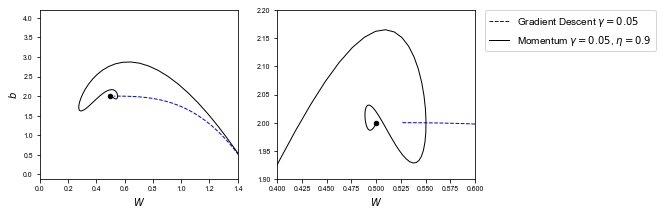

In [229]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

fig = plt.figure(figsize=(7.8, 3.1))


ax = fig.add_subplot(1, 2, 1)

ax.plot(*zip(*theta),  color = 'blue',  lw=1, ls = 'dashed',  label = r"Time decay $\alpha = 0.2$")
ax.plot(*zip(*thetaMom),   color = 'black' , lw=1, label = r"Time decay $\alpha = 0.2$")
plt.scatter(0.5,2.0,marker='o', color = 'black', s = 20)

ax.set_xlabel(r'$W$')
ax.set_ylabel(r'$b$')
ax.set_xlim(0,1.4)

ax = fig.add_subplot(1, 2, 2)

ax.plot(*zip(*theta),  color = 'blue',  lw=1, ls = 'dashed',  label = r"Gradient Descent $\gamma= 0.05$")
ax.plot(*zip(*thetaMom),   color = 'black' , lw=1, label = r"Momentum $\gamma = 0.05$, $\eta = 0.9$")
plt.scatter(0.5,2.0,marker='o', color = 'black', s = 20)
ax.set_xlim(0.4,0.6)
ax.set_ylim(1.9,2.2)

ax.set_xlabel(r'$W$')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#ax.set_ylabel(r'$b$')
#ax.set_title(r'$W,b$ convergence to $(0.5,2)$')

fig.savefig('Figure_4-23'+'.png', format='png', dpi=300,bbox_inches='tight')
plt.show()

## Figure 4-25: RMSProp and GD

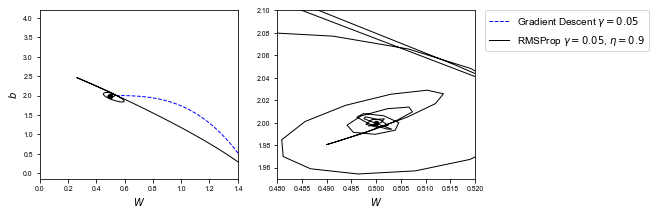

In [322]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

fig = plt.figure(figsize=(7.8, 3.1))


ax = fig.add_subplot(1, 2, 1)

ax.plot(*zip(*theta),  color = 'blue',  lw=1, ls = 'dashed',  label = r"Time decay $\alpha = 0.2$")
ax.plot(*zip(*thetaRms),   color = 'black' , lw=1, label = r"Time decay $\alpha = 0.2$")
plt.scatter(0.5,2.0,marker='o', color = 'black', s = 20)

ax.set_xlabel(r'$W$')
ax.set_ylabel(r'$b$')
ax.set_xlim(0,1.4)

ax = fig.add_subplot(1, 2, 2)

ax.plot(*zip(*theta),  color = 'blue',  lw=1, ls = 'dashed',  label = r"Gradient Descent $\gamma= 0.05$")
ax.plot(*zip(*thetaRms),   color = 'black' , lw=1, label = r"RMSProp $\gamma = 0.05$, $\eta = 0.9$")
plt.scatter(0.5,2.0,marker='o', color = 'black', s = 20)
ax.set_xlim(0.48,0.52)
ax.set_ylim(1.95,2.1)

ax.set_xlabel(r'$W$')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#ax.set_ylabel(r'$b$')
#ax.set_title(r'$W,b$ convergence to $(0.5,2)$')

fig.savefig('Figure_4-24'+'.png', format='png', dpi=300,bbox_inches='tight')
plt.show()

## Figure 4-XXX - 2D GD and Adam

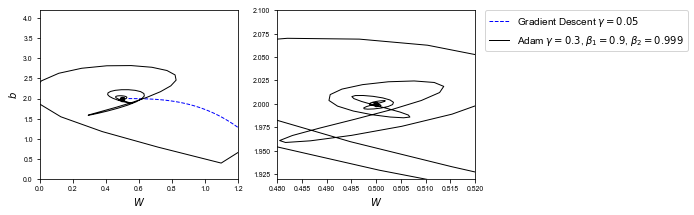

In [343]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

fig = plt.figure(figsize=(7.8, 3.1))


ax = fig.add_subplot(1, 2, 1)

ax.plot(*zip(*theta),  color = 'blue',  lw=1, ls = 'dashed',  label = r"Time decay $\alpha = 0.2$")
ax.plot(*zip(*thetaAdam),   color = 'black' , lw=1, label = r"Time decay $\alpha = 0.2$")
plt.scatter(0.5,2.0,marker='o', color = 'black', s = 20)

ax.set_xlabel(r'$W$')
ax.set_ylabel(r'$b$')
ax.set_xlim(0,1.2)

ax = fig.add_subplot(1, 2, 2)

ax.plot(*zip(*theta),  color = 'blue',  lw=1, ls = 'dashed',  label = r"Gradient Descent $\gamma= 0.05$")
ax.plot(*zip(*thetaAdam),   color = 'black' , lw=1, label = r"Adam $\gamma = 0.3$, $\beta_1 = 0.9$, $\beta_2=0.999$")
plt.scatter(0.5,2.0,marker='o', color = 'black', s = 20)
ax.set_xlim(0.48,0.52)
ax.set_ylim(1.92,2.1)

ax.set_xlabel(r'$W$')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#ax.set_ylabel(r'$b$')
#ax.set_title(r'$W,b$ convergence to $(0.5,2)$')

fig.savefig('Figure_4-27'+'.png', format='png', dpi=300,bbox_inches='tight')
plt.show()

In [344]:
thetaAdam

[(2.5, 4.0),
 (1.1000001430511475, 0.3999999463558197),
 (0.71700549125671387, 0.79524886608123779),
 (0.37917047739028931, 1.1805108785629272),
 (0.127451092004776, 1.5483334064483643),
 (-0.01041334867477417, 1.8887367248535156),
 (-0.041232593357563019, 2.1897203922271729),
 (0.0093482285737991333, 2.4391505718231201),
 (0.11513693630695343, 2.6277804374694824),
 (0.25389713048934937, 2.7518033981323242),
 (0.40613234043121338, 2.8132901191711426),
 (0.55365532636642456, 2.8186337947845459),
 (0.67975878715515137, 2.776451587677002),
 (0.77116960287094116, 2.696035623550415),
 (0.82041007280349731, 2.5865716934204102),
 (0.82660704851150513, 2.4568872451782227),
 (0.79432463645935059, 2.3154420852661133),
 (0.73164510726928711, 2.1703565120697021),
 (0.64861518144607544, 2.0293571949005127),
 (0.5562480092048645, 1.8995815515518188),
 (0.4657246470451355, 1.7872519493103027),
 (0.38742208480834961, 1.6972916126251221),
 (0.32970842719078064, 1.6329973936080933),
 (0.2978335022926330

## 2D GD, RMSProp, Momentum

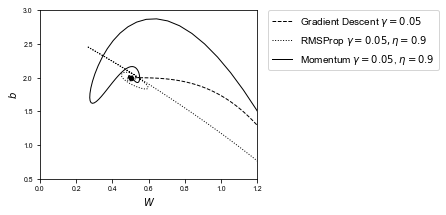

In [327]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

fig = plt.figure(figsize=(3.9, 3.1))


ax = fig.add_subplot(1, 1, 1)

ax.plot(*zip(*theta),  color = 'black',  lw=1, ls = 'dashed',  label = r"Gradient Descent $\gamma = 0.05$")
ax.plot(*zip(*thetaRms),   color = 'black' , ls = 'dotted', lw=1, label = r"RMSProp $\gamma = 0.05, \eta= 0.9$")
ax.plot(*zip(*thetaMom),   color = 'black' , lw=1, label = r"Momentum $\gamma = 0.05$, $\eta = 0.9$")
plt.scatter(0.5,2.0,marker='o', color = 'black', s = 20)

ax.set_xlabel(r'$W$')
ax.set_ylabel(r'$b$')
ax.set_xlim(0,1.2)
ax.set_ylim(0.5, 3.0)



plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#ax.set_ylabel(r'$b$')
#ax.set_title(r'$W,b$ convergence to $(0.5,2)$')

fig.savefig('Figure_4-26'+'.png', format='png', dpi=300,bbox_inches='tight')
plt.show()

##### Various

In [ ]:
 fig, ax = plt.subplots(figsize=(3.9, 3.1))

theta = list(zip(W,b))
thetaAdam = list(zip(Wadam,badam))

plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')



for j in range(1,len(W)):
    ax.annotate('', xy=theta[j], xytext=theta[j-1], 
                arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1,'ls': 'dashed'}, va='center', ha='center')
ax.scatter(*zip(*theta), cmap='gray', color = 'brown', s=40, lw=0, label = r"Time decay $\alpha = 0.2$")

for j in range(1,len(W)):
    ax.annotate('', xy=thetaAdam[j], xytext=thetaAdam[j-1], 
                arrowprops={'arrowstyle': '->', 'color': 'b', 'lw': 1,'ls': 'dashed'}, va='center', ha='center')
ax.scatter(*zip(*thetaAdam), cmap='gray', color = 'black' ,s=40, lw=0, label = r"Time decay $\alpha = 0.2$")

for j in range(1,len(W)):
    ax.annotate('', xy=thetaAda[j], xytext=thetaAda[j-1], 
                arrowprops={'arrowstyle': '->', 'color': 'orange', 'lw': 1,'ls': 'dashed'}, va='center', ha='center')
ax.scatter(*zip(*thetaAda), cmap='gray', color = 'black' ,s=40, lw=0, label = r"Time decay $\alpha = 0.2$")

for j in range(1,len(W)):
    ax.annotate('', xy=thetaMom[j], xytext=thetaMom[j-1], 
                arrowprops={'arrowstyle': '->', 'color': 'green', 'lw': 1,'ls': 'dashed'}, va='center', ha='center')
ax.scatter(*zip(*thetaMom), cmap='gray', color = 'black' ,s=40, lw=0, label = r"Time decay $\alpha = 0.2$")


plt.scatter(0.5,2.0,marker='o', color = 'black', s = 70)


ax.set_xlabel(r'$W$')
ax.set_ylabel(r'$b$')
ax.set_xlim(0.4,0.6)
ax.set_ylim(1.8,2.1)
ax.set_title(r'W,b convergence to (0.5,2)')

fig.savefig('Figure_4-X'+'.png', format='png', dpi=300,bbox_inches='tight')
plt.show()

## Figure 4-21

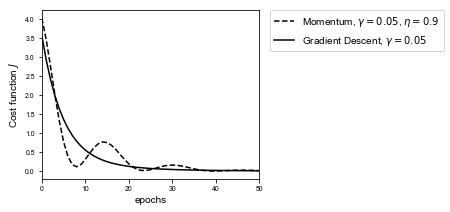

In [220]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(3.9, 3.1))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cost_history_mom, ls='dashed', color = 'black', label = "Momentum, $\gamma=0.05$, $\eta=0.9$")
ax.plot(cost_history, ls='-', color = 'black', 
        label = 'Gradient Descent, $\gamma = 0.05$')
#ax.plot(cost_history15, ls='--', color = 'black', 
#        label = '1 layer, 15 neurons ($Q=11935$), Batch size = 50, \n$\gamma = 0.05$')
ax.set_xlabel('epochs')
ax.set_ylabel('Cost function $J$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim((0,50))



#fig.savefig('Figure_1-19'+'.pdf', format='pdf', dpi=300,bbox_inches='tight')
fig.savefig('Figure_4-21'+'.png', format='png', dpi=300,bbox_inches='tight')



# RMSProp and GD

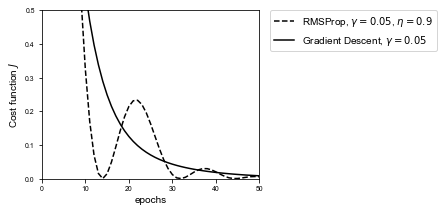

In [313]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(3.9, 3.1))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cost_history_rms, ls='dashed', color = 'black', label = "RMSProp, $\gamma=0.05$, $\eta=0.9$")
ax.plot(cost_history, ls='-', color = 'black', 
        label = 'Gradient Descent, $\gamma = 0.05$')
#ax.plot(cost_history15, ls='--', color = 'black', 
#        label = '1 layer, 15 neurons ($Q=11935$), Batch size = 50, \n$\gamma = 0.05$')
ax.set_xlabel('epochs')
ax.set_ylabel('Cost function $J$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim((0,50))
plt.ylim(0, 0.5)



#fig.savefig('Figure_1-19'+'.pdf', format='pdf', dpi=300,bbox_inches='tight')
fig.savefig('Figure_4-24'+'.png', format='png', dpi=300,bbox_inches='tight')



# Cost function for all together

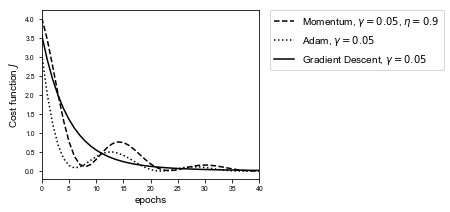

In [305]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(3.9, 3.1))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cost_history_mom, ls='dashed', color = 'black', label = "Momentum, $\gamma=0.05$, $\eta=0.9$")
ax.plot(cost_history_adam, ls='dotted', color = 'black', label = "Adam, $\gamma=0.05$")
ax.plot(cost_history, ls='-', color = 'black', label = 'Gradient Descent, $\gamma = 0.05$')
#ax.plot(cost_history15, ls='--', color = 'black', 
#        label = '1 layer, 15 neurons ($Q=11935$), Batch size = 50, \n$\gamma = 0.05$')
ax.set_xlabel('epochs')
ax.set_ylabel('Cost function $J$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim((0,40))



#fig.savefig('Figure_1-19'+'.pdf', format='pdf', dpi=300,bbox_inches='tight')
fig.savefig('Figure_4-X'+'.png', format='png', dpi=300,bbox_inches='tight')



# Exponential Weighted averages

In [121]:
t = np.arange(0,100,1)
theta_function = np.exp(-(t-50)**2/200)/10
beta = (1-0.9)*0.9**(50-t)*((50-t)>0)
conv = (beta*theta_function)[1:50]

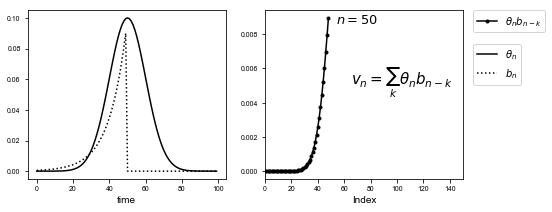

In [122]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(7.8, 3.1))
ax = fig.add_subplot(1, 2, 1)
ax.plot(t,theta_function, ls='solid', color = 'black', label = r'$\theta_n$')
ax.plot(beta, ls='dotted', color = 'black', label = r'$b_n$')
ax.set_xlabel('time')
#ax.text(8,4.7,'(A)' , fontsize = 15)
ax.set_ylabel('')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(bbox_to_anchor=(2.25, 0.8), loc=2, borderaxespad=0.)

ax = fig.add_subplot(1, 2 ,2)

#fig = plt.figure(figsize=(3.9, 3.1))
#ax = fig.add_subplot(1, 1, 1)
#ax.plot(J, ls='dotted', color = 'black', label = r'$\nu$ = 0.2')
#ax.text(8,0.08,'(B)' , fontsize = 15)
ax.plot( conv, ls='solid', marker = '.', color = 'black', label = r'$\theta_n b_{n-k}$')
#ax.plot(theta_function, ls='dotted', color = 'black', label = r'$\theta$')
ax.set_xlabel('Index')
#ax.set_ylabel('Cost function $J$')
plt.xlim (0,150)
ax.text(65,0.005, r'$v_n=\sum_k \theta_n b_{n-k}$' , fontsize = 15)
ax.text(54,0.0086, r'$n=50$' , fontsize = 13)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#fig.savefig('Figure_1-19'+'.pdf', format='pdf', dpi=300,bbox_inches='tight')
#fig.savefig('Figure_4-19'+'.png', format='png', dpi=300,bbox_inches='tight')

## The series $b_n$

In [139]:
t = np.arange(0,50,1)
beta09 = (1-0.9)*0.9**t
beta05 = (1-0.8)*0.8**t
beta01 = (1-0.3)*0.3**t

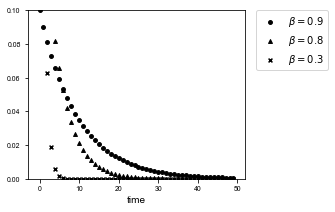

In [152]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(3.9, 3.1))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(t,beta09, marker = 'o', s=15, label = r'$\beta=0.9$', color = 'black')
ax.scatter(t,beta05, marker = '^', s=15, label = r'$\beta=0.8$', color = 'black')
ax.scatter(t,beta01, marker = 'x', s=15, label = r'$\beta=0.3$', color = 'black')
ax.set_xlabel('time')
#ax.text(8,4.7,'(A)' , fontsize = 15)
ax.set_ylabel('')
ax.set_ylim(0,0.1)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
#fig.savefig('Figure_1-19'+'.pdf', format='pdf', dpi=300,bbox_inches='tight')
fig.savefig('Figure_4-20'+'.png', format='png', dpi=300,bbox_inches='tight')

# 3d Surface of the cost function

In [118]:
def cost_f(w,b):
    ycalc = w*x+b
    cost = np.square(np.subtract(y, ycalc)).mean()
    return cost

In [119]:
N = 101
wl = np.linspace(-1.5,2.5,N)
bl = np.linspace(0,4,N)
w_,b_ = np.meshgrid(wl,bl)
costz = np.empty([N,N])
for i in range(0,N):
    for j in range (0,N):
        costz[j,i] = cost_f(wl[i], bl[j])

In [309]:
WW = np.array(theta)[1:,0]
bb = np.array(theta)[1:,1]

WW1,bb1 = np.meshgrid(WW,bb)
#cost1 = cost(WW,bb)

cost1 = np.empty(len(WW))
for i in range (0,len(WW)):
    cost1[i] = cost_f(WW[i], bb[i])
    
WWMom = np.array(thetaMom)[1:,0]
bbMom = np.array(thetaMom)[1:,1]    
costMom = np.empty(len(WWMom))
for i in range (0,len(WWMom)):
    costMom[i] = cost_f(WWMom[i], bbMom[i])
    
WWAdam = np.array(thetaAdam)[1:,0]
bbAdam = np.array(thetaAdam)[1:,1]    
costAdam = np.empty(len(WWAdam))
for i in range (0,len(WWAdam)):
    costAdam[i] = cost_f(WWAdam[i], bbAdam[i])
    
WWRms = np.array(thetaRms)[1:,0]
bbRms = np.array(thetaRms)[1:,1]    
costRms = np.empty(len(WWRms))
for i in range (0,len(WWRms)):
    costRms[i] = cost_f(WWRms[i], bbRms[i])


## Figure 4-23 - GD and Momentum only

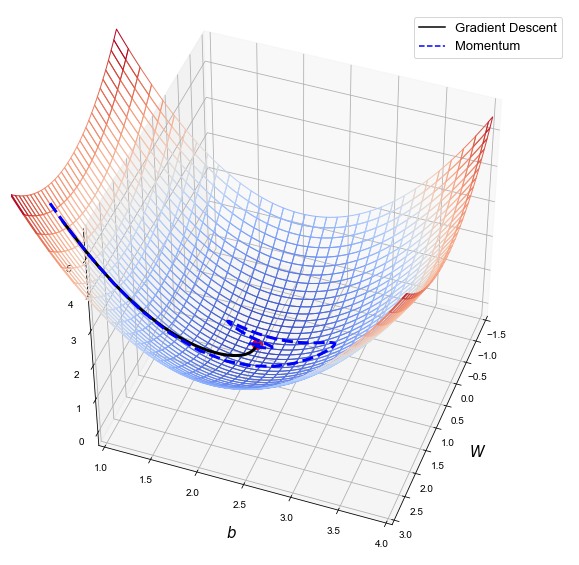

In [245]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

#ax = plt.axes(projection='3d')

plt.rc('font', family='arial')
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')

ax.set_xlabel(r'$W$', fontsize = 15, labelpad = 16)
ax.set_ylabel(r'$b$', fontsize = 15, labelpad = 12)
ax.view_init(45,20) #20

#ax.contour3D(wl, bl, costz, 40, cmap=cm.coolwarm)
#ax.plot_surface(b, w, costz,cmap=cm.coolwarm)

colors = cm.coolwarm(costz/np.max(costz))

surf = ax.plot_surface( w_, b_, costz,  facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))


#ax.set_zlim(0, 10)
ax.set_xlim(-1.5,3)
ax.set_ylim(1,4)

ax.plot3D(WW,bb,cost1, color = 'black', lw = 3, ls='solid', zorder = 5)#, s= 30zorder = 0.5)
ax.plot3D(WWMom,bbMom,costMom, color = 'blue', lw = 3,  ls = 'dashed', zorder = 10)#, s= 30)
ax.scatter(.5, 2.0, 0, color = 'red', s = 100, zorder = 15)

fake2DlineGD = mpl.lines.Line2D([0],[0], linestyle="solid", c='black')
fake2DlineMom = mpl.lines.Line2D([0],[0], linestyle="dashed", c='blue')

ax.legend([#fake2DlineAdam, 
           fake2DlineGD, 
           fake2DlineMom 
           #fake2DlineAda
          ], 
          ['Gradient Descent', 'Momentum'], numpoints = 1, fontsize = 13)



plt.show()

fig.savefig('Figure_4-22'+'.png', format='png', dpi=300,bbox_inches='tight')



## GD and Adam

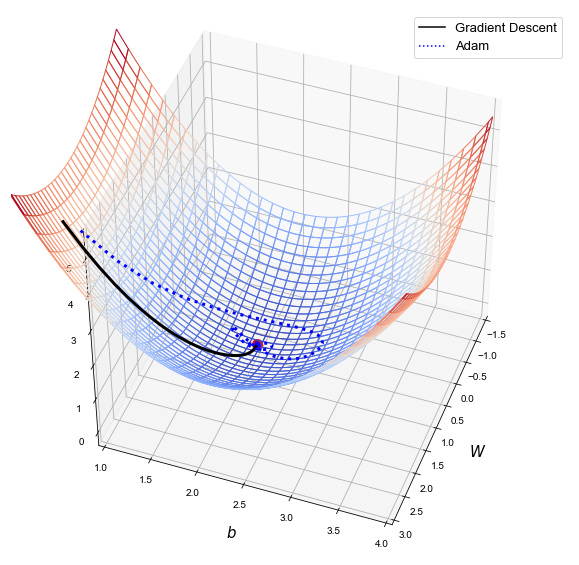

In [283]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

#ax = plt.axes(projection='3d')

plt.rc('font', family='arial')
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')

ax.set_xlabel(r'$W$', fontsize = 15, labelpad = 16)
ax.set_ylabel(r'$b$', fontsize = 15, labelpad = 12)
ax.view_init(45,20) #20

#ax.contour3D(wl, bl, costz, 40, cmap=cm.coolwarm)
#ax.plot_surface(b, w, costz,cmap=cm.coolwarm)

colors = cm.coolwarm(costz/np.max(costz))

surf = ax.plot_surface( w_, b_, costz,  facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))


#ax.set_zlim(0, 10)
ax.set_xlim(-1.5,3)
ax.set_ylim(1,4)

ax.plot3D(WW,bb,cost1, color = 'black', lw = 3, ls='solid', zorder = 5)
ax.plot3D(WWAdam,bbAdam,costAdam, color = 'blue', lw = 3,  ls = 'dotted', zorder = 10)#, s= 30)
ax.scatter(.5, 2.0, 0, color = 'red', s = 100, zorder = 15)

#fake2DlineAdam = mpl.lines.Line2D([0],[0], linestyle="-.", c='b')
fake2DlineGD = mpl.lines.Line2D([0],[0], linestyle="solid", c='black')
fake2DlineAdam = mpl.lines.Line2D([0],[0], linestyle="dotted", c='blue')
#fake2DlineAda = mpl.lines.Line2D([0],[0], linestyle="solid", c='orange')

ax.legend([#fake2DlineAdam, 
           fake2DlineGD, 
           fake2DlineAdam 
           #fake2DlineAda
          ], 
          ['Gradient Descent', 'Adam'], numpoints = 1, fontsize = 13)





plt.show()

fig.savefig('Figure_4-X'+'.png', format='png', dpi=300,bbox_inches='tight')



## Figure 4-25: GD and RMSProp

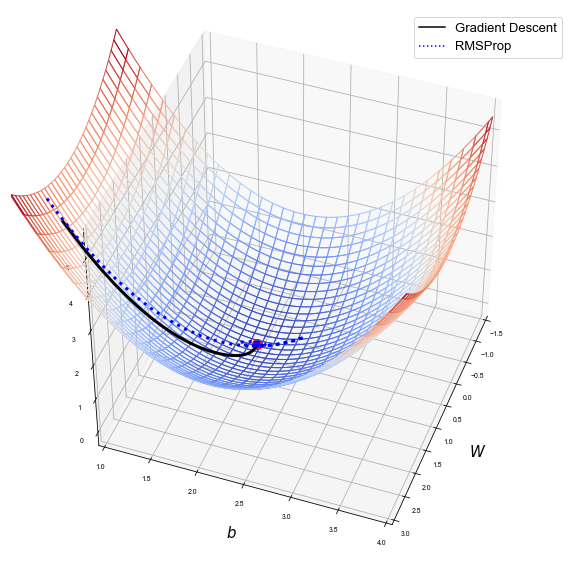

In [323]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

#ax = plt.axes(projection='3d')

plt.rc('font', family='arial')
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')

ax.set_xlabel(r'$W$', fontsize = 15, labelpad = 16)
ax.set_ylabel(r'$b$', fontsize = 15, labelpad = 12)
ax.view_init(45,20) #20

#ax.contour3D(wl, bl, costz, 40, cmap=cm.coolwarm)
#ax.plot_surface(b, w, costz,cmap=cm.coolwarm)

colors = cm.coolwarm(costz/np.max(costz))

surf = ax.plot_surface( w_, b_, costz,  facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))


#ax.set_zlim(0, 10)
ax.set_xlim(-1.5,3)
ax.set_ylim(1,4)

ax.plot3D(WW,bb,cost1, color = 'black', lw = 3, ls='solid', zorder = 5)#, s= 30zorder = 0.5)
#ax.plot3D(WWAda,bbAda,costAda, color = 'orange', lw = 3, zorder = 5)#, s= 30zorder = 0.5)
#ax.plot3D(WWAdam,bbAdam,costAdam, color = 'blue', ls = '-.',lw = 3, zorder = 10)#, s= 30)
ax.plot3D(WWRms,bbRms,costRms, color = 'blue', lw = 3,  ls = 'dotted', zorder = 10)#, s= 30)
ax.scatter(.5, 2.0, 0, color = 'red', s = 100, zorder = 15)

#fake2DlineAdam = mpl.lines.Line2D([0],[0], linestyle="-.", c='b')
fake2DlineGD = mpl.lines.Line2D([0],[0], linestyle="solid", c='black')
fake2DlineRms = mpl.lines.Line2D([0],[0], linestyle="dotted", c='blue')
#fake2DlineAda = mpl.lines.Line2D([0],[0], linestyle="solid", c='orange')

ax.legend([#fake2DlineAdam, 
           fake2DlineGD, 
           fake2DlineRms
           #fake2DlineAda
          ], 
          ['Gradient Descent', 'RMSProp'], numpoints = 1, fontsize = 13)





plt.show()

fig.savefig('Figure_4-25'+'.png', format='png', dpi=300,bbox_inches='tight')



## All together

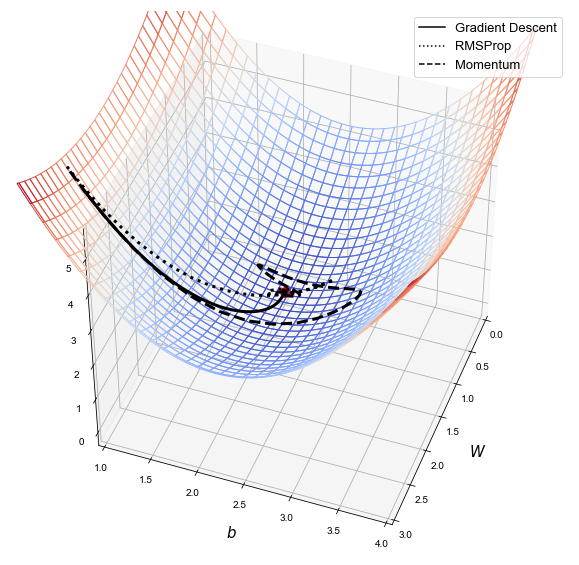

In [324]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

#ax = plt.axes(projection='3d')

plt.rc('font', family='arial')
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')

ax.set_xlabel(r'$W$', fontsize = 15, labelpad = 16)
ax.set_ylabel(r'$b$', fontsize = 15, labelpad = 12)
ax.view_init(45,20) #20

#ax.contour3D(wl, bl, costz, 40, cmap=cm.coolwarm)
#ax.plot_surface(b, w, costz,cmap=cm.coolwarm)

colors = cm.coolwarm(costz/np.max(costz))

surf = ax.plot_surface( w_, b_, costz,  facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))


#ax.set_zlim(0, 10)
ax.set_xlim(0,3)
ax.set_ylim(1,4)

ax.plot3D(WW,bb,cost1, color = 'black', lw = 3, ls='solid', zorder = 5)#, s= 30zorder = 0.5)
#ax.plot3D(WWAda,bbAda,costAda, color = 'orange', lw = 3, zorder = 5)#, s= 30zorder = 0.5)
ax.plot3D(WWMom,bbMom,costMom, color = 'black', ls = 'dashed',lw = 3, zorder = 10)#, s= 30)
ax.plot3D(WWRms,bbRms,costRms, color = 'black', lw = 3,  ls = 'dotted', zorder = 10)#, s= 30)
ax.scatter(.5, 2.0, 0, color = 'red', s = 100, zorder = 15)

#fake2DlineAdam = mpl.lines.Line2D([0],[0], linestyle="-.", c='b')
fake2DlineGD = mpl.lines.Line2D([0],[0], linestyle="solid", c='black')
fake2DlineRms = mpl.lines.Line2D([0],[0], linestyle="dotted", c='black')
fake2DlineMom = mpl.lines.Line2D([0],[0], linestyle="dashed", c='black')

ax.legend([#fake2DlineAdam, 
           fake2DlineGD, 
           fake2DlineRms, 
           fake2DlineMom
          ], 
          ['Gradient Descent', 'RMSProp', 'Momentum'], numpoints = 1, fontsize = 13)





plt.show()

fig.savefig('Figure_4-X'+'.png', format='png', dpi=300,bbox_inches='tight')

